In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
from keras.preprocessing import image
import tqdm

Using TensorFlow backend.


In [0]:
img_path = '/content/train_images/000c1434d8d7.png'
img_loaded = image.load_img(img_path)

img_load_cv2 = cv2.imread(img_path)
img_load_cv2 = cv2.cvtColor(img_load_cv2, cv2.COLOR_BGR2RGB)

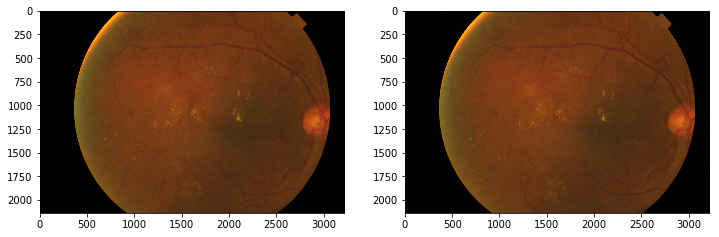

In [3]:
plt.figure(figsize=(12,12))
plt.subplot(1,2,1)
plt.imshow(img_loaded)

plt.subplot(1,2,2)
plt.imshow(img_load_cv2)

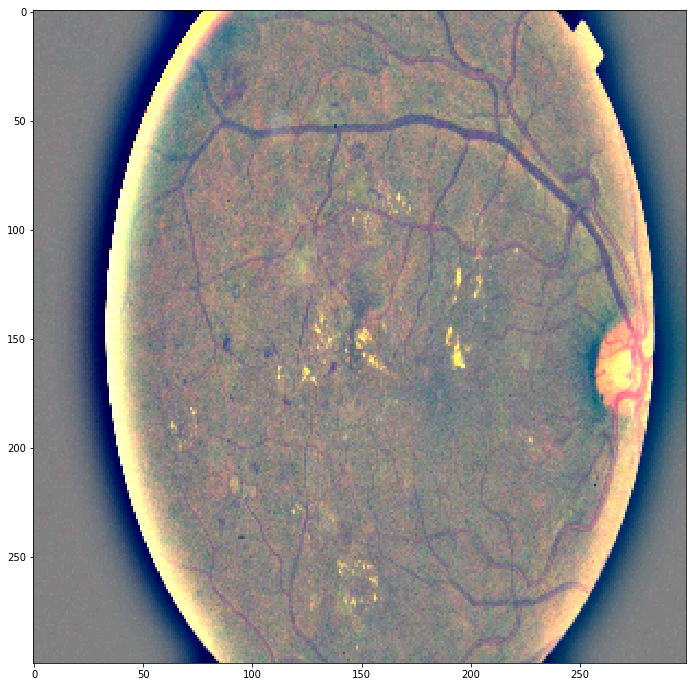

In [4]:
img_load_cv2 = cv2.imread(img_path)
img_load_cv2 = cv2.cvtColor(img_load_cv2, cv2.COLOR_BGR2RGB)
img_load_cv2 = cv2.resize(img_load_cv2, (299, 299))
cv2_weighted_img = cv2.addWeighted(img_load_cv2, 4, cv2.GaussianBlur(img_load_cv2, (0,0), 10), -4, 128)

plt.figure(figsize=(12,12))
plt.imshow(cv2_weighted_img)

In [0]:
os.mkdir('/content/preprocess_train_v2')

In [6]:
os.listdir('/content/train_images')

['bf9cba745efc.png',
 'a45d77edf8d9.png',
 '12e6e66c80a7.png',
 '070d4ce5fd90.png',
 'f8fc411092c7.png',
 'c5a9ebef1517.png',
 'fa9bece586fc.png',
 '28824d12d31d.png',
 'b294927b14b0.png',
 'c5b58cc992af.png',
 'c3d12a23f451.png',
 '29f9e1ac9507.png',
 '8be6629a6039.png',
 '1d0b93317aa8.png',
 '19545647508e.png',
 'fa3e544a7401.png',
 '76cab26493f1.png',
 '7fdb177b8f7d.png',
 '31cb39681f6a.png',
 '475c7ded0f7a.png',
 '12025b34deb8.png',
 'b21abe5d9722.png',
 '4242c0d87f57.png',
 'a61723fc38c2.png',
 '80b5a9519aec.png',
 '55f7f018c61c.png',
 '17188c13e635.png',
 'a7b0d0c51731.png',
 '91a88d3b0358.png',
 '5293576816aa.png',
 'ca7570c5925c.png',
 '0fe31196e0e8.png',
 'df84e7113003.png',
 'fdc685055659.png',
 'e16af45285e5.png',
 '4e231670b48c.png',
 '15cd5f52d300.png',
 'ba4e62c11cc0.png',
 '42cc993f23a9.png',
 'b64e1eef3d63.png',
 '85f99e7e4052.png',
 '405085b53d7b.png',
 'f7defe70afc3.png',
 'f2094a20b275.png',
 '2241b7e90782.png',
 'bfdee9be1f1d.png',
 'bb783d8e496f.png',
 'db690e2d02f

bf9cba745efc.png


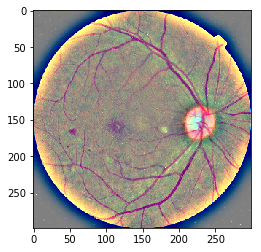

In [7]:
img_counter = 0
for img_num in os.listdir(f'/content/train_images'):
  print(img_num)
  img_path = f'/content/train_images/{img_num}'
  img_load_cv2 = cv2.imread(img_path)
  img_load_cv2 = cv2.cvtColor(img_load_cv2, cv2.COLOR_BGR2RGB)
  img_load_cv2 = cv2.resize(img_load_cv2, (299, 299))
  cv2_weighted_img = cv2.addWeighted(img_load_cv2, 4, cv2.GaussianBlur(img_load_cv2, (0,0), 10), -4, 128)
  # cv2.imwrite(f'/content/preprocess_train/img_num')
  plt.imshow(cv2_weighted_img)
  
  img_counter += 1
  if img_counter == 1:
    break

In [0]:
def img_preprocess(img_dir, target_dir, img_size = 299):
  for img_num in os.listdir(f'/content/{img_dir}'):
    img_path = f'/content/{img_dir}/{img_num}' 
    img_load_cv2 = cv2.imread(img_path)
    img_load_cv2 = cv2.resize(img_load_cv2, (img_size, img_size), interpolation = cv2.INTER_LINEAR)
    cv2_weighted_img = cv2.addWeighted(img_load_cv2, 4, cv2.GaussianBlur(img_load_cv2, (0,0), 10), -4, 128)
    CV2_weighted_img = cv2.cvtColor(cv2_weighted_img, cv2.COLOR_BGR2RGB)
    cv2.imwrite(f'/content/{target_dir}/{img_num}', cv2_weighted_img)


In [0]:
img_preprocess('train_images', 'preprocess_train_v2', img_size=300)

In [0]:
assert os.listdir('/content/train_images') == os.listdir('/content/preprocess_train_v2')